### Customer Churning Project


In [ ]:
# Importing relevant libraries for plotting and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE



# Data Exploration & Understanding

In [94]:
data = pd.read_csv('/content/bigml_59c28831336c6604c800002a.csv')
data


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


### Data Columns

In [95]:
# inspect the data columns
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Dataset characteristics

In [96]:
# summary of the dataset structure and characteristics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Check duplicate values of the dataset

In [97]:
# check duplicate values in the dataset
data.duplicated().sum()

# There are no duplicates in the dataset

0

### Structure of the data set

In [98]:
# the structure of the data set
data.shape

(3333, 21)

### Understand the statistical summary of the dataset

In [99]:
# inspect the statistical summary of the dataset
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Understand the variables in the dataset

In [100]:
# Understand the dataset variables
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

## Check unique values in the dataset

In [101]:
# Check Unique Values for each variable.
unique_values_per_col = data.nunique()
print("Number of Unique Values per Column:")
print(unique_values_per_col)

Number of Unique Values per Column:
state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64


In [102]:
# check unique values in the dataset
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'state': ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
Unique values in column 'account length': [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69

### Check missing values

In [103]:
# Check for missing values in the entire the dataset
missing_values_total = data.isna().sum()

# Check for missing values in each column
missing_values_per_column = data.isna().sum(axis=0)

# Check for missing values in each row
missing_values_per_row = data.isna().sum(axis=1)

print("Missing values in the entire dataset:")
print(missing_values_total)

print("\nMissing values in each column:")
print(missing_values_per_column)

print("\nMissing values in each row:")
print(missing_values_per_row)


Missing values in the entire dataset:
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Missing values in each column:
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls      

### Distribution of the data in the dataset

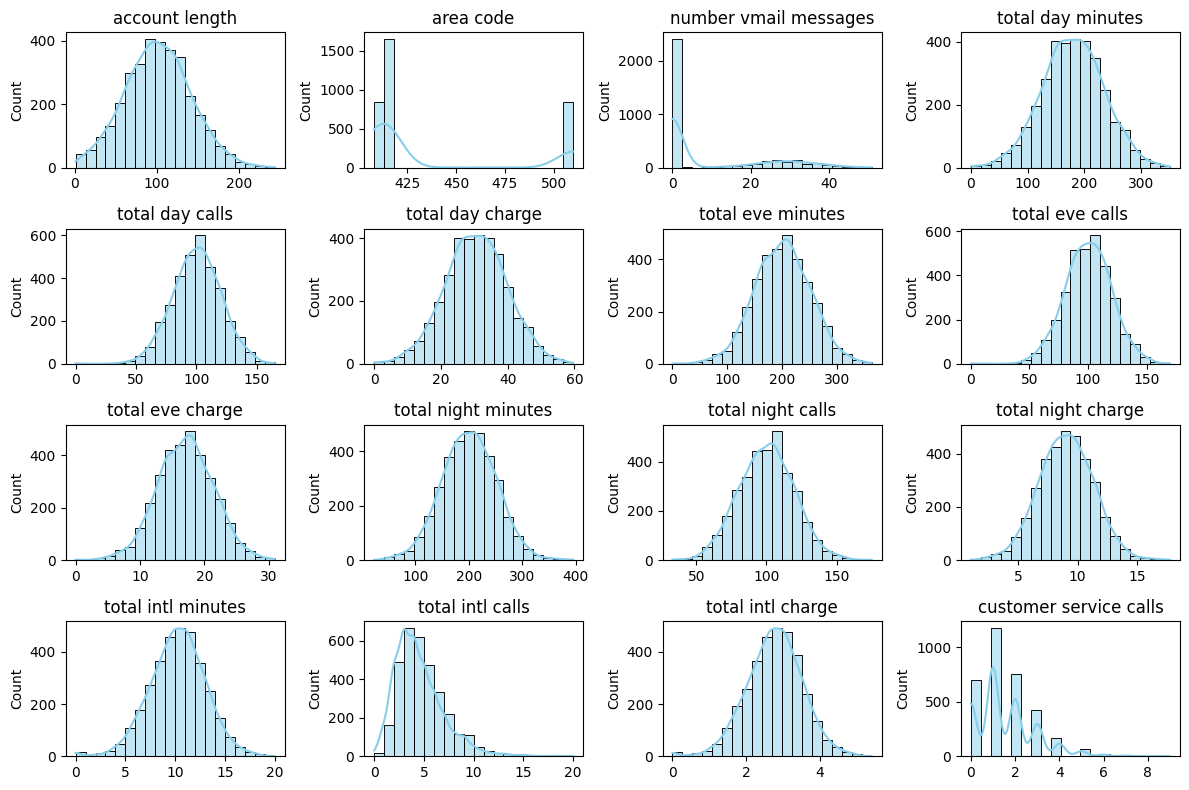

In [104]:
#  distribution of variables in the dataset
# Columns in the dataset
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical variables
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data[column], kde=True, color='skyblue', bins=20)
    plt.title(column)
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [105]:
# Drop unnecessary columns
data = data.drop(columns=[ "phone number"])
#data


### Scatterplots Numerical variables vs Churn

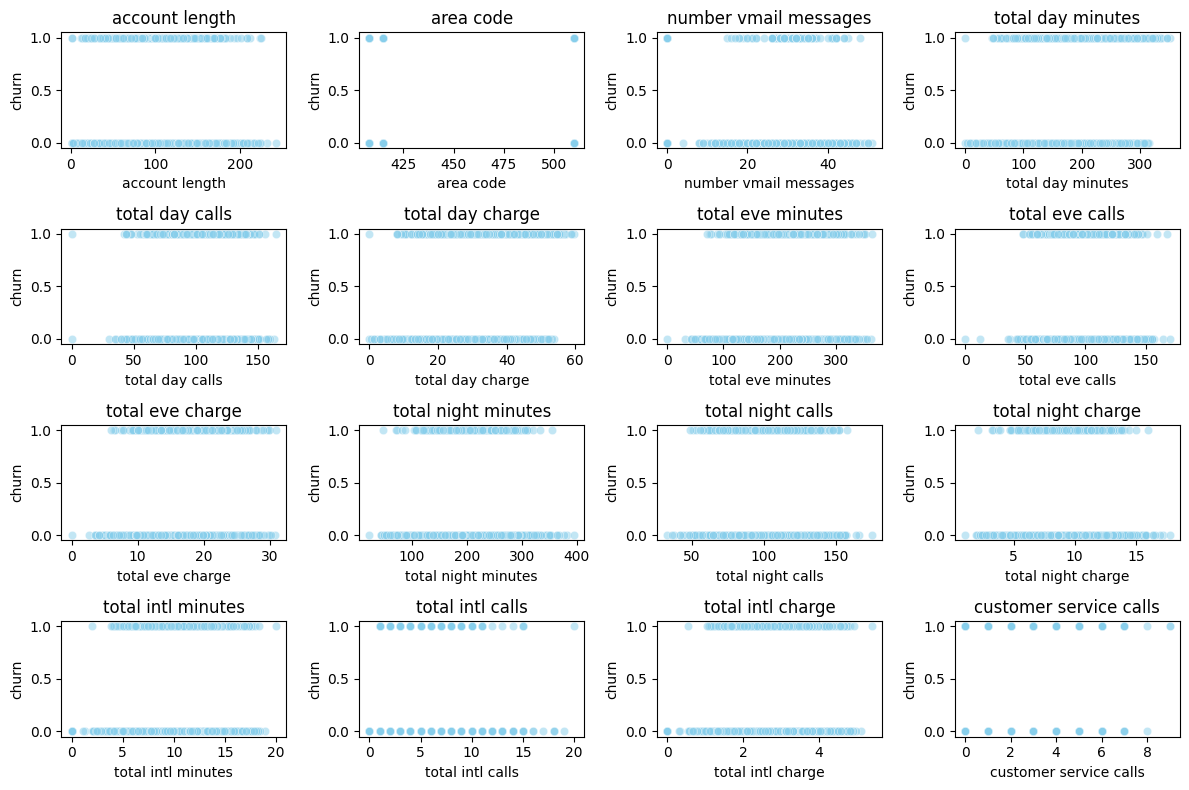

In [106]:
# Scatter plots for numerical variables vs. churn
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.scatterplot(x=column, y='churn', data=data, color='skyblue', alpha=0.5)
    plt.title(column)
plt.tight_layout()
plt.show()

In [107]:
#data = pd.get_dummies(data, columns=[ "international plan", "voice mail plan"], drop_first=True)

## Converting Categorical to numerical data

Using data label encoder

In [108]:

# use label encoding to transform categorical data
label_encoder = LabelEncoder()

data['international plan'] = label_encoder.fit_transform(data['international plan'])

# Label encoding 'voice mail plan'
data['voice mail plan'] = label_encoder.fit_transform(data['voice mail plan'])

# Label encoding "state"
data['state'] = label_encoder.fit_transform(data['state'])

# decode international plan
decoded_international_plan = label_encoder.inverse_transform(data['international plan'])

# decode voice mail plan
decoded_voice_mail_plan = label_encoder.inverse_transform(data['voice mail plan'])

# decode state
decoded_voice_mail_plan = label_encoder.inverse_transform(data['state'])


## Correlation of variables in the dataset

In [109]:
# correlation of the dataset
data.corr()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,1.000000,0.003678,0.015814,-0.004597,-0.031664,-0.027762,-0.006737,-0.000764,-0.006736,0.013682,-0.016268,0.013674,0.024576,0.007458,0.024572,-0.007834,0.013967,-0.007819,-0.025861,0.007780
account length,0.003678,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,0.015814,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
international plan,-0.004597,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
voice mail plan,-0.031664,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
number vmail messages,-0.027762,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,-0.006737,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,-0.000764,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,-0.006736,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,0.013682,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796


## Heatmap Visuals
Correlation of variables in the dataset

In [ ]:
# Create a heatmap to visualise the correlation of the variables
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Scatterplot

Relationship of high correlation variables in the dataset

In [ ]:
# Scatterplot: Total Day Minutes vs. Total Day Charge with hue of churn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total day minutes', y='total day charge', hue='churn', data=data)
plt.title('Total Day Minutes vs. Total Day Charge (Colored by Churn)')
plt.xlabel('Total Day Minutes')
plt.ylabel('Total Day Charge')
plt.show()

# Scatterplot: Total Eve Minutes vs. Total Eve Charge with hue of churn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total eve minutes', y='total eve charge', hue='churn', data=data)
plt.title('Total Eve Minutes vs. Total Eve Charge (Colored by Churn)')
plt.xlabel('Total Eve Minutes')
plt.ylabel('Total Eve Charge')
plt.show()

# Scatterplot: Total Night Minutes vs. Total Night Charge with hue of churn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total night minutes', y='total night charge', hue='churn', data=data)
plt.title('Total Night Minutes vs. Total Night Charge (Colored by Churn)')
plt.xlabel('Total Night Minutes')
plt.ylabel('Total Night Charge')
plt.show()

# Scatterplot: Total Intl Minutes vs. Total Intl Charge with hue of churn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total intl minutes', y='total intl charge', hue='churn', data=data)
plt.title('Total Intl Minutes vs. Total Intl Charge (Colored by Churn)')
plt.xlabel('Total Intl Minutes')
plt.ylabel('Total Intl Charge')
plt.show()

# Scatterplot: Customer Service Calls vs. Churn with hue of churn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='customer service calls', y="total intl minutes", hue='churn', data=data)
plt.title('Customer Service Calls vs. Churn (Colored by Churn)')
plt.xlabel('Customer Service Calls')
plt.ylabel('Churn')
plt.show()


## Histogram Visualisation

Check the distriution of variables with high correlation with churn

In [ ]:
# distribution of total day charge and churn status
fig = px.histogram(data, x="total day charge", color="churn",
                   title="Distribution of Total day Charge by Churn Status")
fig.show()

In [ ]:
# distribution of total int charge verse vi churn
fig = px.histogram(data, x="total intl charge", color="churn",
                   title="Distribution of Total Intl Charge by Churn Status")
fig.show()

In [ ]:
# distribution of customer service calls and churn
fig = px.histogram(data, x="customer service calls", color="churn",
                   title="Distribution of customer service calls by Churn Status")
fig.show()

In [ ]:
# distribution of total eve change and churn
fig = px.histogram(data, x="total eve charge", color="churn",
                   title="Distribution of total eve charge by Churn Status")
fig.show()

In [ ]:
# distribution of international plan and churn
fig = px.histogram(data, x="international plan", color="churn",
                   title="Distribution of International Plan with Color Encoding by Churn Status",
                   labels={"international plan": "International Plan", "churn": "Churn Status"})
fig.update_xaxes(type='category')  # Ensure 'international plan' is treated as a categorical variable
fig.show()

In [ ]:
# distribution of the target variable
fig = px.histogram(data, x="churn", color="churn",
                   title="Distribution of Churn Status")
fig.show()


In [ ]:
 # characterisitcs of the dataset
 data.info()

### Data Processing

In [ ]:

#data = pd.get_dummies(data, columns=[ "international plan", "voice mail plan", "churn","state"], drop_first=True)
#data

In [ ]:

# check number counts of the values in the columns
for columns in data.columns:
    print(columns,'\n', data[columns].value_counts()/len(data))

##### There is data imbalances as displayed in area code, number of vmail messages, customer service calls, and the states

## Data Processing

In [ ]:
## normalize the numerical variables
# use the converted categorical data
# handle imabalanced data as the data distribution is skewed

In [ ]:
# X predictors  and y - targeted variable as churn
X = data.drop(columns=['churn'], axis=1)
y = data['churn']
data['churn'] = data['churn'].astype(int)

# Split the data into training and testing sets with a 75-25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# checking features data after spliting the training and test sets
X.info()

In [ ]:
# stardardize the data features using StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features in X
X  = scaler.fit_transform(X)

In [ ]:
# view scaled data variables columns arrays
X

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, recall_score, f1_score, precision_score

#  Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Fit the model on the resampled training data
gb_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Calculate and print the performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1-score:", f1_score(y_test, y_pred_gb))
print("ROC-AUC Score:", roc_auc_score(y_test, gb_classifier.predict_proba(X_test)[:, 1]))

# Print the classification report
print(classification_report(y_test, y_pred_gb))


In [ ]:
# use  SMOTE to reduce class class imbalance
smote = SMOTE(random_state=42)

# Fit SMOTE to training data and generate samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# show class distribution
print(pd.Series(y_train_resampled).value_counts())



In [ ]:

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the resampled training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate and print the performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1]))

# Print the classification report
print(classification_report(y_test, y_pred_rf))


In [ ]:

# Support Vector Machine (SVM)
svm_classifier = SVC(random_state=42)

# Fit the model on the resampled training data
svm_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Calculate and print the performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1-score:", f1_score(y_test, y_pred_svm))

# Print the classification report
print(classification_report(y_test, y_pred_svm))


In [ ]:

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the resampled training data
dt_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Calculate and print the performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-score:", f1_score(y_test, y_pred_dt))

# Print the classification report
print(classification_report(y_test, y_pred_dt))


In [ ]:

from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the resampled training data
knn_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Calculate and print the performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1-score:", f1_score(y_test, y_pred_knn))
print("ROC-AUC Score:", roc_auc_score(y_test, knn_classifier.predict_proba(X_test)[:, 1]))

# Print the classification report
print(classification_report(y_test, y_pred_knn))


In [ ]:
# prompt: logistic regression, precision, accuracy, f1 score, recall

# Logistic Regression
logreg_classifier = LogisticRegression(random_state=42)

# Fit the model on the resampled training data
logreg_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_logreg = logreg_classifier.predict(X_test)

# Calculate and print the performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1-score:", f1_score(y_test, y_pred_logreg))
print("ROC-AUC Score:", roc_auc_score(y_test, logreg_classifier.predict_proba(X_test)[:, 1]))

# Print the classification report
print(classification_report(y_test, y_pred_logreg))


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_test and y_pred variables are defined for each classifier

# Define the classifier names
classifiers = ["Gradient Boosting", "Random Forest", "SVM", "Decision Tree", "KNN", "Logistic Regression"]

# Define the corresponding performance metrics
accuracy = [accuracy_score(y_test, y_pred_gb), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_logreg)]
precision = [precision_score(y_test, y_pred_gb), precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_svm), precision_score(y_test, y_pred_dt), precision_score(y_test, y_pred_knn), precision_score(y_test, y_pred_logreg)]
recall = [recall_score(y_test, y_pred_gb), recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_svm), recall_score(y_test, y_pred_dt), recall_score(y_test, y_pred_knn), recall_score(y_test, y_pred_logreg)]
f1 = [f1_score(y_test, y_pred_gb), f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_svm), f1_score(y_test, y_pred_dt), f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_logreg)]

# Create a dictionary to store the results
results = {
    "Classifier": classifiers,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
}

# Create a Pandas DataFrame
results_df = pd.DataFrame(results)

# Sort the DataFrame by Accuracy
results_df = results_df.sort_values(by="F1-Score", ascending=False)

# Print the sorted DataFrame
print(results_df.to_string())


In [ ]:
# prompt: hyperparameter tuning for random forest classifier

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(rf_classifier, param_grid, cv=3, n_jobs=-1)

# Fit the grid search object to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred_best = best_model.predict(X_test)

# Calculate and print the performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1-score:", f1_score(y_test, y_pred_best))



In [ ]:
# prompt: Further evaluation of the model's performance on a separate test set to ensure its generalization to unseen data.

# Split the data into training and testing sets with a 75-25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred_best = best_model.predict(X_test)

# Calculate and print the performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1-score:", f1_score(y_test, y_pred_best))

# Print the classification report
print(classification_report(y_test, y_pred_best))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# prompt: Perform cross-validation to validate the performance of your model with the best hyperparameters.

from sklearn.model_selection import cross_val_score

# Perform cross-validation with the best model
scores = cross_val_score(best_model, X_train_resampled, y_train_resampled, cv=5)

# Print the average accuracy
print("Average accuracy:", scores.mean())

# Print the standard deviation of the accuracy
print("Standard deviation:", scores.std())
